In [9]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# loading the dataset
df = pd.read_csv('data_science.csv')

In [11]:
# Extracts top 5 data
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


# Exploring Data 
**This dataset provides information about data science and machine learning job roles, including details about salaries, work conditions, and employment patterns across various companies and locations.**

1. **`Unnamed 0:`** Appears to be an index column (can be ignored or dropped if unnecessary). - Yes, I dropped it later on.


2. **`work_year:`** The year in which the data was recorded (2020, 2021, 2022). This can show trends in job roles, salaries, and employment practices over tim


3. **`experience_level:`** Describes the level of experience required for the job. Possible values include:

        MI: Middle
    
        SE: Senior
    
        EN: Entry Level
    
        EX: Executive


4. **`employment_type:`** Specifies the type of employment contract. It includes values like:

        FT: Full-Time
    
        PT: Part-Time
    
        CT: Contract
    
        FL: Freelance


5. **`job_title:`** The title of the job role (e.g., "Data Scientist", "Machine Learning Engineer").


6. **`salary:`** The gross salary offered for the position in the original currency. (Similar to salary_in_usd - so it is dropped)


7. **`salary_currency:`** The currency in which the salary is paid (e.g., USD, EUR, GBP).


8. **`salary_in_usd:`** The salary converted to USD for comparison purposes.


9. **`employee_residence:`** The country of residence of the employee.


10. **`remote_ratio:`** Indicates the percentage of time the employee works remotely. Possible values include:

        0: No remote work
    
        50: Partially remote
    
        100: Fully remote


11. **`company_location:`** The country where the company is located.


12. **`company_size:`** The size of the company, represented by:

    S: Small (fewer than 50 employees)
    
    M: Medium (50-250 employees)
    
    L: Large (more than 250 employees)
    
    -------------

# Statistical Information about Data

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


Thus the data does not have any null values

In [13]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
602    False
603    False
604    False
605    False
606    False
Length: 607, dtype: bool

The data also does not have duplicated values

# Exploring Data Using Data Science

In [14]:
# Gives the shape(rows, columns) of data
df.shape

(607, 12)

In [15]:
# Dropping unnecessary columns
df.drop(['Unnamed: 0', 'salary'], axis = 1, inplace = True)

In [16]:
df

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,USD,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,USD,150000,US,100,US,M


<AxesSubplot:xlabel='work_year'>

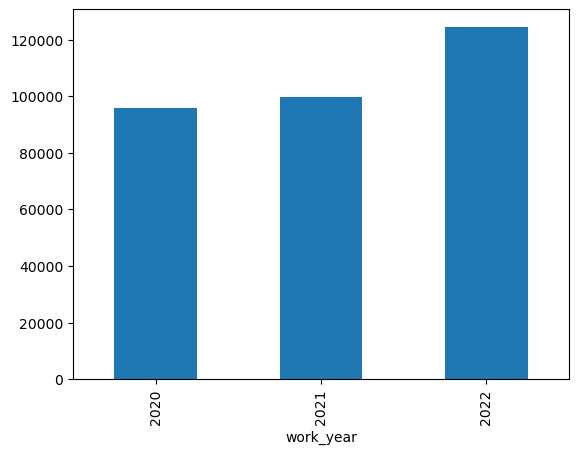

In [17]:
df1 = df.groupby('work_year')['salary_in_usd'].mean().round(2)
df1.plot(kind = 'bar')

The above plot shows how the average salary in USD has changed over the years. Each bar corresponds to a year(2020,21,22), and the height of the bar represents the mean salary for that year.

-----------------------

# Average Salaries by years

In [18]:
df1.index

Int64Index([2020, 2021, 2022], dtype='int64', name='work_year')

In [19]:
df1.values

array([ 95813.  ,  99853.79, 124522.01])

In [20]:
data = {
    'work_year' : df1.index,
    'average_salary' : df1.values
}

df1 = pd.DataFrame(data)
df1

,work_year,average_salary
0,2020,95813.00
1,2021,99853.79
2,2022,124522.01


In [21]:
df1['average_salary'] = (df1['average_salary'] / 1000).round(2)
df1

,work_year,average_salary
0,2020,95.81
1,2021,99.85
2,2022,124.52


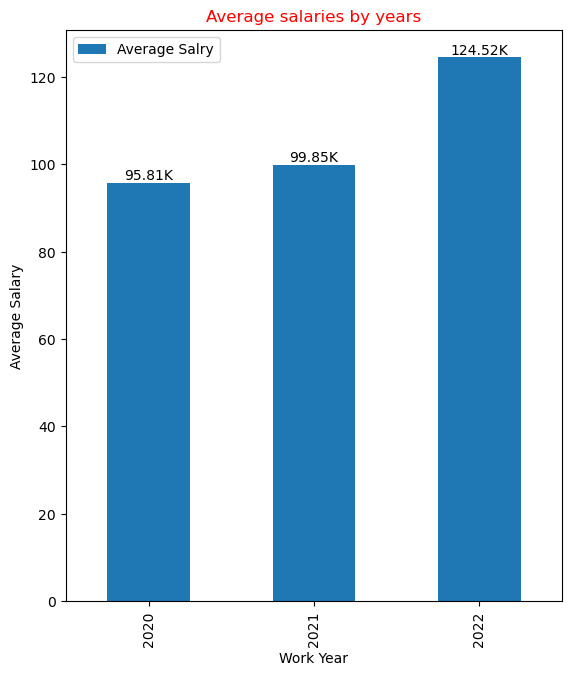

In [22]:
ax = df1.plot(kind = 'bar', x = 'work_year', y = 'average_salary', legend = True)
ax.bar_label(ax.containers[0], labels = df1['average_salary'].map('{:.2f}K'.format))
plt.subplots_adjust(top = 1.3)
ax.legend(['Average Salry'], loc = 'upper left')

plt.xlabel('Work Year')
plt.ylabel('Average Salary')
plt.title('Average salaries by years', color = 'red')
plt.show()

----------

# Onsite - Remote Analysis
Let's explore how many are working while resting at home, who are struggling to get into the offices and who are enjoying (may be not enjoying much) hybrid.

In [23]:
df2 = df.remote_ratio.value_counts()
df2

100    381
0      127
50      99
Name: remote_ratio, dtype: int64

In [24]:
values = df2.to_list()
values

[381, 127, 99]

In [25]:
labels = ['Fully remote', 'No remote', 'Partially remote']

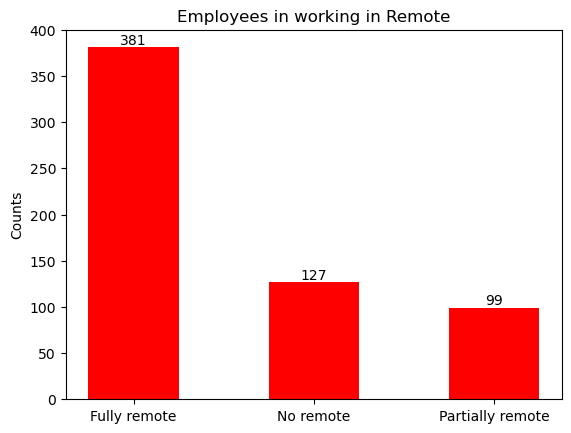

In [26]:
z = plt.bar(labels, values, width = 0.5, color = 'red')
plt.bar_label(z, labels = values)
plt.title('Employees in working in Remote')
plt.ylabel('Counts')
plt.show()

Thus, we can observe that majority of employees are working from home

---------------

# Company Size

In [27]:
df3 = df.company_size.value_counts()
df3

M    326
L    198
S     83
Name: company_size, dtype: int64

In [28]:
df3.index.to_list()

['M', 'L', 'S']

In [29]:
values2 = df3.values
values2

array([326, 198,  83], dtype=int64)

In [30]:
labels_for_company = ['Medium', 'Large', 'Small']

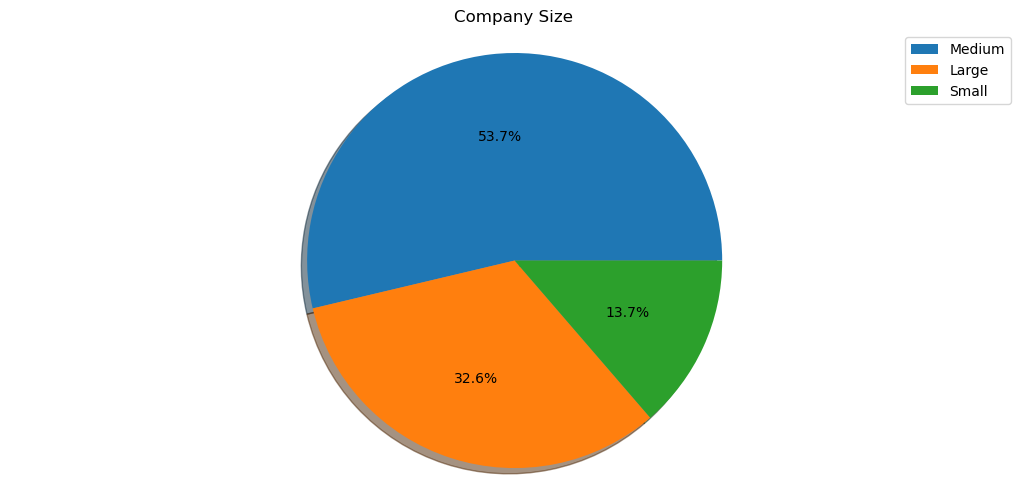

In [31]:
plt.figure(figsize = (13,6))
plt.pie(x = values2, labels = None, autopct = '%1.1f%%', shadow = True)
plt.axis('equal')
plt.legend(labels = labels_for_company, loc = 'upper right')
plt.title('Company Size')
plt.show()

----------------

# What are Top 5 Jobs in Data Science Field??

In [32]:
df4 = df.job_title.value_counts()[:5]
df4

Data Scientist               143
Data Engineer                132
Data Analyst                  97
Machine Learning Engineer     41
Research Scientist            16
Name: job_title, dtype: int64

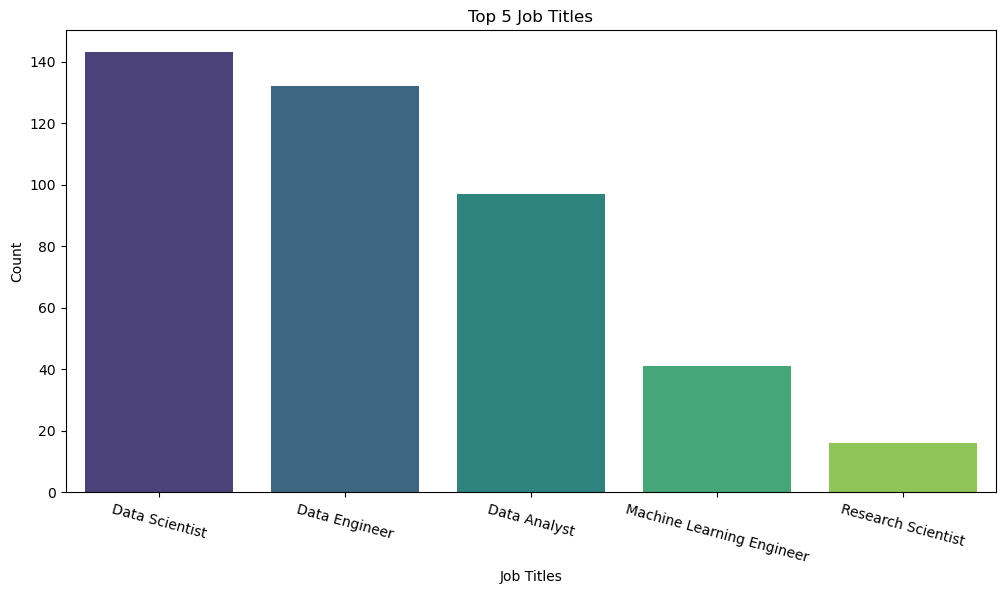

In [33]:
plt.figure(figsize = (12,6))
#plt.bar(x = df4.index, y = df4.values)
sns.barplot(x = df4.index, y = df4.values, palette = 'viridis')
plt.title('Top 5 Job Titles')
plt.xlabel('Job Titles')
plt.ylabel('Count')
plt.xticks(rotation = -15)
plt.show()

---------------------------

## Does Salary depends on Comapny Size??

In [34]:
df5 = df[['salary_in_usd', 'company_size']]
df5

,salary_in_usd,company_size
0,79833,L
1,260000,S
2,109024,M
3,20000,S
4,150000,L
...,...,...
602,154000,M
603,126000,M
604,129000,M
605,150000,M


In [35]:
S = df5[df5['company_size'] == 'S']
M = df5[df5['company_size'] == 'M']
L = df5[df5['company_size'] == 'L']

labels = ['Medium', 'Large', 'Small']

sal_mean = [S['salary_in_usd'].mean(), M['salary_in_usd'].mean(), L['salary_in_usd'].mean()]

In [36]:
sal_mean

[77632.67469879518, 116905.46625766871, 119242.99494949495]

In [37]:
label_change = np.round([x/1000 for x in sal_mean], 2)
label_change = list(map(str, label_change))
label_change = [x + ' K' for x in label_change]
label_change

['77.63 K', '116.91 K', '119.24 K']

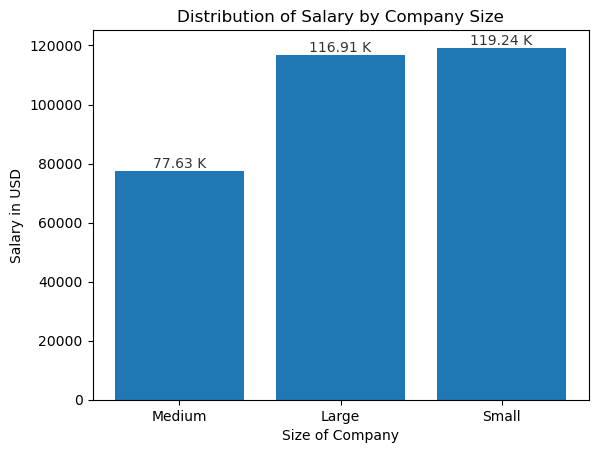

In [38]:
z = plt.bar(labels, sal_mean)
plt.bar_label(z, label_change, alpha = 0.8)
plt.title('Distribution of Salary by Company Size')
plt.xlabel('Size of Company')
plt.ylabel('Salary in USD')
plt.show()

Text(0.5, 0, 'Salary in USD')

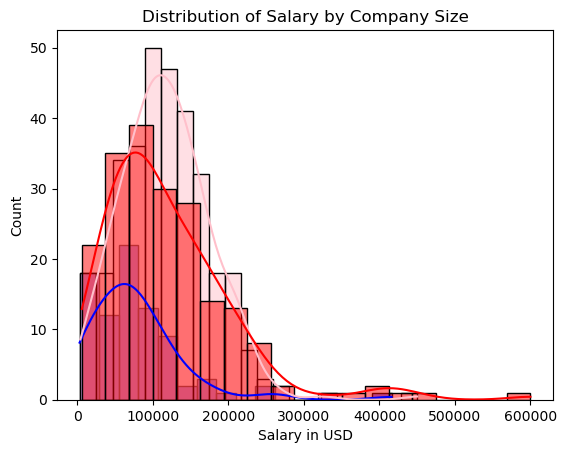

In [39]:
sns.histplot(S['salary_in_usd'], label = "Small", kde = True, color = 'blue')
sns.histplot(M['salary_in_usd'], label = "Medium", kde = True, color = 'pink')
sns.histplot(L['salary_in_usd'], label = "Large", kde = True, color = 'red')

plt.title('Distribution of Salary by Company Size')
plt.xlabel('Salary in USD')

------------------------

# Employees and their Experience Level

In [40]:
df6 = df.experience_level.value_counts()
df6

SE    280
MI    213
EN     88
EX     26
Name: experience_level, dtype: int64

In [41]:
exp_map = {
    'SE': 'Seniors',
    'MI': 'Middle',
    'EN': 'Entry Level',
    'EX': 'Executive'
}

# Replace values in the original dataframe's 'experience_level' column
df['experience_level'].replace(exp_map, inplace=True)

# Now get the value counts with the updated mapping
df6 = df['experience_level'].value_counts()

# Convert the index to a list
df6.index.to_list()


['Seniors', 'Middle', 'Entry Level', 'Executive']

In [42]:
labels = df6.index.to_list()
labels

['Seniors', 'Middle', 'Entry Level', 'Executive']

In [43]:
values = df6.values
values

array([280, 213,  88,  26], dtype=int64)

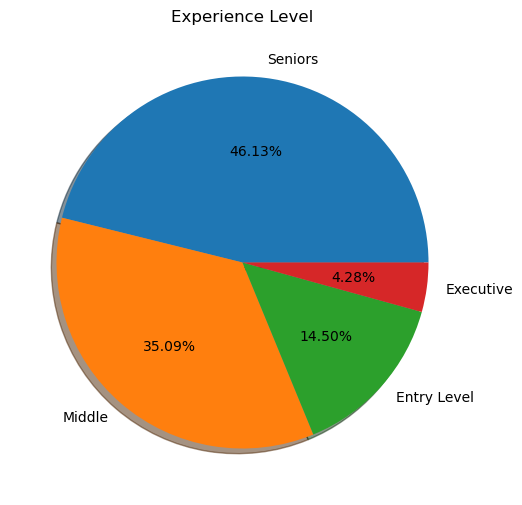

In [44]:
plt.figure(figsize = (6,12))
plt.pie(x = values, labels = labels, autopct = '%1.2f%%', shadow = True)
plt.title('Experience Level')
plt.show()

----

**This is the whole Data Analysis of Data Science data using numpy, pandas, plotting the graphs, visualizing the insights of the data.**

 #                                        **Thank You! 😊💐**
